In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DataTrained/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Looking for NaN
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 26 variables which are integers(some of the categorical variables are represented in integer format) and 9 variables that are of string datatype

In [6]:
df.shape

(1470, 35)

Text(0.5, 1.0, 'Attrition Breakdown')

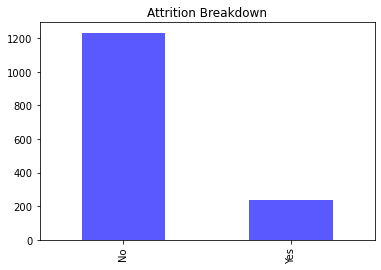

In [7]:
df.Attrition.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Attrition Breakdown")

The dataset is imbalanced

##### Breakdown of Attribution data with respect to Gender

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64
The total employees attritioned, 36.71% are Female
The total employees attritioned, 63.29% are Male
The total no.of Male employees, 17.01% attritioned
The total no.of Female employees, 14.80% attritioned


Text(0, 0.5, 'Frequency of Attrition')

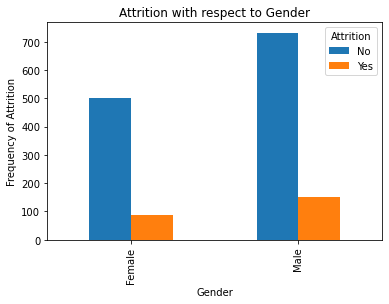

In [8]:
groupby_Gender = df.groupby("Gender")["Attrition"]
print(groupby_Gender.value_counts())

print("The total employees attritioned, {:.2f}% are Female".format(groupby_Gender.value_counts()["Female"]["Yes"]/(groupby_Gender.value_counts()["Female"]["Yes"] + groupby_Gender.value_counts()["Male"]["Yes"])*100))
print("The total employees attritioned, {:.2f}% are Male".format(groupby_Gender.value_counts()["Male"]["Yes"]/(groupby_Gender.value_counts()["Female"]["Yes"] + groupby_Gender.value_counts()["Male"]["Yes"])*100))

print("The total no.of Male employees, {:.2f}% attritioned".format(groupby_Gender.value_counts()["Male"]["Yes"]/df["Gender"].value_counts()["Male"]*100))
print("The total no.of Female employees, {:.2f}% attritioned".format(groupby_Gender.value_counts()["Female"]["Yes"]/df["Gender"].value_counts()["Female"]*100))



pd.crosstab(df.Gender,df.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

Based on the above chart, Gender seems to have some effect on Attrition. It seems like more male employees have been attritioned than the female employees.

##### Breakdown of Attribution data with respect to BusinessTravel

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

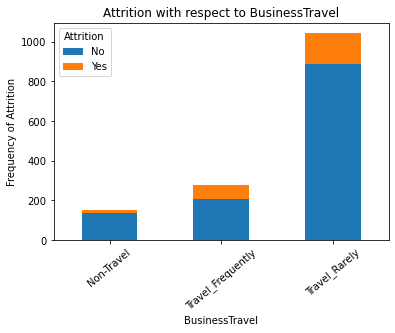

In [9]:
bt=pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Employees traveling rarely are attritioned when compared to employees traveling frequently and non travel

##### Breakdown of Attribution data with respect to MaritalStatus

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

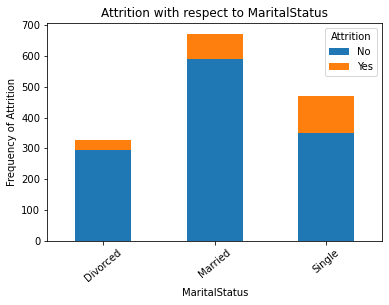

In [10]:
pd.crosstab(df.MaritalStatus,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Based on the above chart,It seems like large majority of those who have been attritioned was a relatively single.

<AxesSubplot:xlabel='Age', ylabel='Count'>

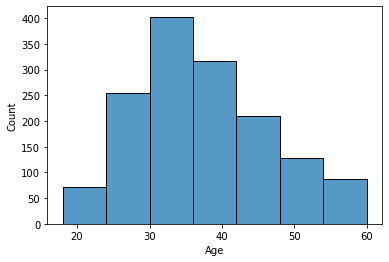

In [11]:
plt.figure()
sns.histplot(data = df, x = 'Age', bins = 7)

From above histogram, we can get to know that most of the employees fall in the working age between 25 and 48.

In [12]:
minvalue = df['DailyRate'].min()
  
minvalue

102

In [13]:
maxvalue = df['DailyRate'].max()
  
maxvalue

1499

<AxesSubplot:xlabel='DailyRate', ylabel='Count'>

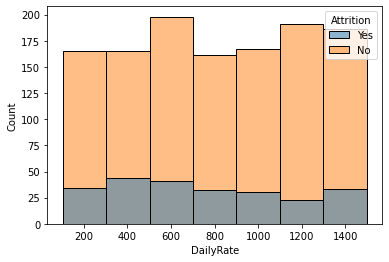

In [14]:
plt.figure()
sns.histplot(data = df, x = "DailyRate", hue = "Attrition", bins = 7)

With histogram bins = 7, the distribution looks almost uniform.we can say that employees with a Daily rate in between 300 and 500 are attritioned more when compared to other Daily rates. 

##### Attrition with respect to EnvironmentSatisfaction

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

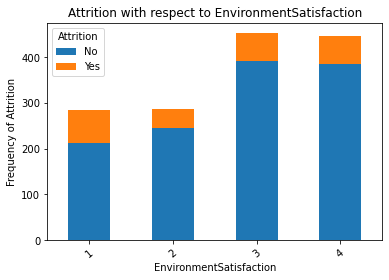

In [15]:
pd.crosstab(df.EnvironmentSatisfaction,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

The distribution plot clearly shows that employees with ‘Low’ Environment Satisfaction have been attritioned more compared to others

##### Attrition with respect to WorkLifeBalance

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

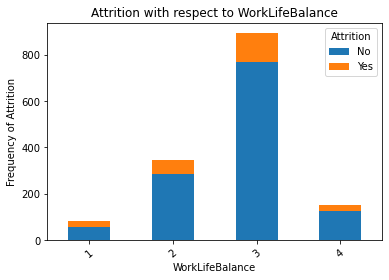

In [16]:
pd.crosstab(df.WorkLifeBalance,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Almost 1/3rd of the employees with Bad(1) work-life balance have been attritioned.

In [17]:
groupby_WorkLifeBalance = df.groupby(by = ["Attrition"])["WorkLifeBalance"]
print(groupby_WorkLifeBalance.value_counts())

Attrition  WorkLifeBalance
No         3                  766
           2                  286
           4                  126
           1                   55
Yes        3                  127
           2                   58
           4                   27
           1                   25
Name: WorkLifeBalance, dtype: int64


##### Attrition with respect to OverTime

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

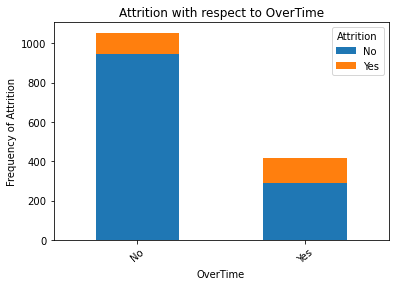

In [18]:
pd.crosstab(df.OverTime,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to OverTime')
plt.xlabel('OverTime')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

We see that Almost 30% of employees working overtime has resign/retire.

##### Attrition with respect to PercentSalaryHike

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '11'),
  Text(1, 0, '12'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '15'),
  Text(5, 0, '16'),
  Text(6, 0, '17'),
  Text(7, 0, '18'),
  Text(8, 0, '19'),
  Text(9, 0, '20'),
  Text(10, 0, '21'),
  Text(11, 0, '22'),
  Text(12, 0, '23'),
  Text(13, 0, '24'),
  Text(14, 0, '25')])

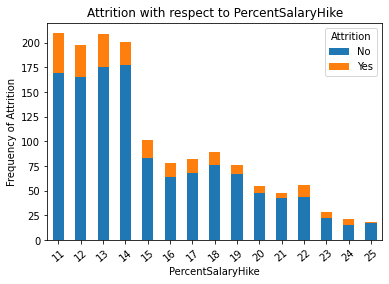

In [19]:
pd.crosstab(df.PercentSalaryHike,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to PercentSalaryHike')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

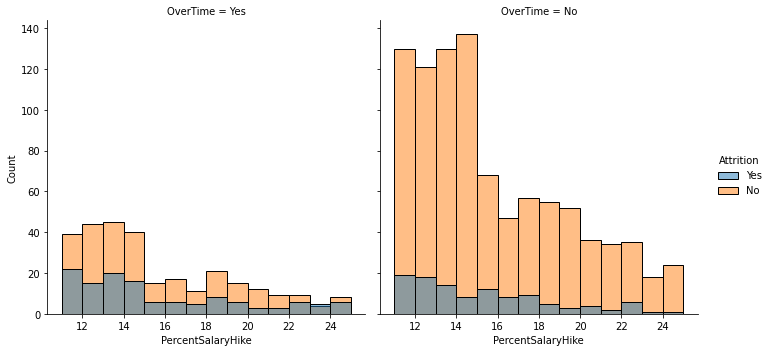

In [20]:
sns.displot(data = df, x = "PercentSalaryHike", hue = "Attrition", col = "OverTime")

From the above plot, we can infer that even after working overtime, if employees do get a good salary hike, they resign.

minimum PerformanceRating of employee is  3
maximum PerformanceRating of employee is  4
Attrition  PerformanceRating  OverTime
No         3                  No          797
                              Yes         247
           4                  No          147
                              Yes          42
Yes        3                  Yes         104
                              No           96
           4                  Yes          23
                              No           14
Name: OverTime, dtype: int64


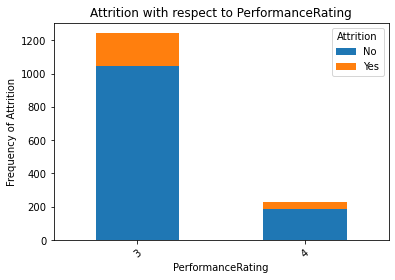

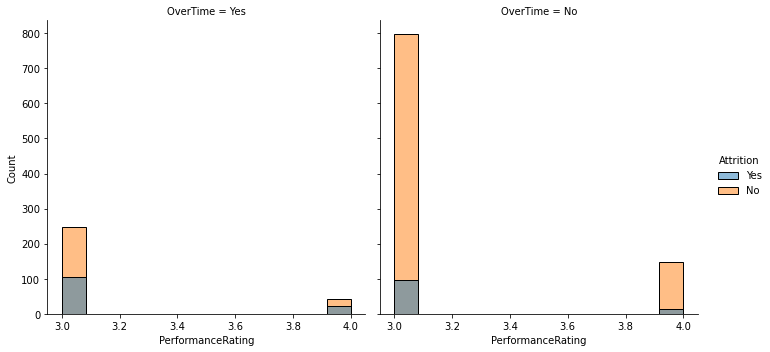

In [21]:
print("minimum PerformanceRating of employee is ",df["PerformanceRating"].min())
print("maximum PerformanceRating of employee is ",df["PerformanceRating"].max())

groupby_PerformanceRating_OverTime = df.groupby(by = ["Attrition", "PerformanceRating"])["OverTime"]
print(groupby_PerformanceRating_OverTime.value_counts())


pd.crosstab(df.PerformanceRating,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

sns.displot(data = df, x = "PerformanceRating", hue = "Attrition", col = "OverTime")


##### Breakdown of Attribution data with respect to Department



(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

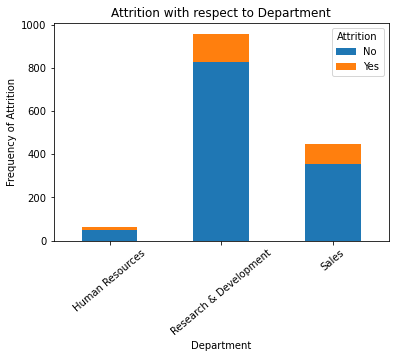

In [22]:
pd.crosstab(df.Department,df.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Department attribute has a prominent effect on the target variable and will be useful for modelling and prediction. R&D department has the highest record for attrition,on the other hand it also has the highest number of employees when compared to HR and Sales departments.

#### Breakdown of Attribution data with respect to EducationField

Text(0, 0.5, 'Frequency of Attrition')

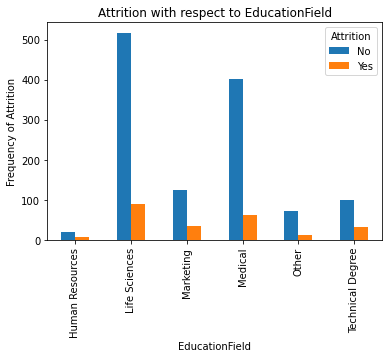

In [23]:
pd.crosstab(df['EducationField'],df['Attrition']).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

LifeSciences and Medical fields have the highest number of employees and attrition rate as well. The percentage of employees who have attritioned against those who have been retained seems to be approximately same in all the education fields

### Distribution of the dataset

##### Invoking the familiar kdeplot function from the Seaborn plotting library and this generates bivariate plots because to have a rough idea of how the features are distributed with one another.

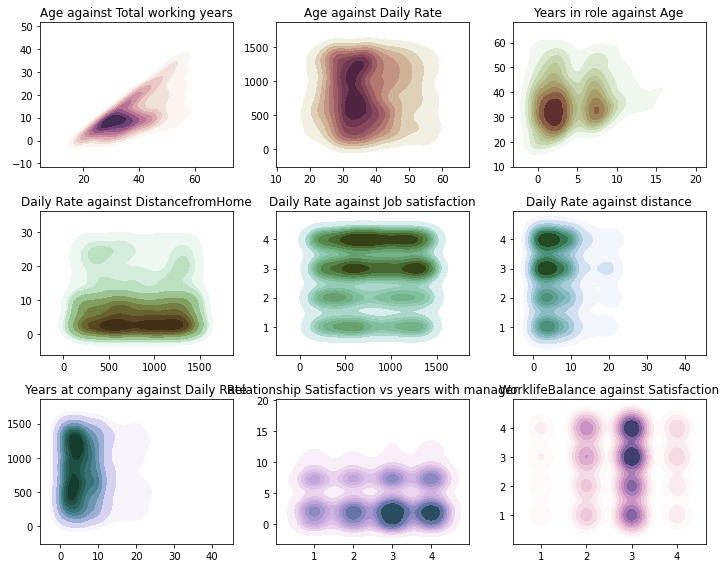

In [24]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8),
sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['Age'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


In [26]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
 #        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another

In [27]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

##### EmployeeCount, Over18, StandardHours has only one unique value. So this variables can be ignored

In [28]:
df.drop(columns = ["StandardHours", "Over18", "EmployeeCount"], inplace = True)

In [29]:
y = df['Attrition']

df.drop('Attrition', axis=1, inplace=True)

In [30]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [31]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

#### Splitting

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,y, 
                                                         train_size= 0.80,
                                                         random_state=0);


In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 31)
(1176,)
(294, 31)
(294,)


### Feature Engineering & Categorical Encoding

In [34]:
def encoding(data):
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]
    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

In [35]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'J

(1176, 52)

In [36]:
x_test_encode=encoding(x_test)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'J

Here we are dividing the dataset into numerical datatype and categorical datatype and storing it in a list and For every catergorical column we have created dummy values for example in case of the department column there are three values (R&D , Human resource and Sales) which becomes a seperate columns with numerical values. Having encoded our categorical columns as well as engineering and created some new features from the numerical data, we can now proceed to merging both dataframes into a final set with which we will train and test our models on.

In [37]:
def target_encode(data):
    # Define a dictionary for the target mapping
    target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target

In [38]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

In [39]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score 

### LogisticRegression 

In [40]:
lr = LogisticRegression()
lr.fit(x_train_encode, y_train_encode)

LogisticRegression()

In [41]:
pred_lr = lr.predict(x_test_encode)

In [42]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, pred_lr)*100))
print("F1 score: {}".format(f1_score(y_test_encode, pred_lr)))
print("="*80)
print(classification_report(y_test_encode, pred_lr))


Accuracy score: 83.6734693877551
F1 score: 0.039999999999999994
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294



### Random Forest Classifier

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train_encode, y_train_encode)

RandomForestClassifier()

In [44]:
pred_rf = rf.predict(x_test_encode)

In [45]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, pred_rf)*100))
print("F1 score: {}".format(f1_score(y_test_encode, pred_rf)))
print("="*80)
print(classification_report(y_test_encode, pred_rf))

Accuracy score: 86.05442176870748
F1 score: 0.3278688524590165
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.83      0.20      0.33        49

    accuracy                           0.86       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.86      0.82       294



### Decision Tree

In [46]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train_encode, y_train_encode)

DecisionTreeClassifier()

In [47]:
pred_dt = dt.predict(x_test_encode)

In [48]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, pred_dt)*100))
print("F1 score: {}".format(f1_score(y_test_encode, pred_dt)))
print("="*80)
print(classification_report(y_test_encode, pred_dt))

Accuracy score: 76.87074829931973
F1 score: 0.34615384615384615
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       245
           1       0.33      0.37      0.35        49

    accuracy                           0.77       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.78      0.77      0.77       294



### Gradient Boosted Classifier

In [49]:
gb = GradientBoostingClassifier()

In [50]:
gb.fit(x_train_encode, y_train_encode)
pred_gb = gb.predict(x_test_encode)

In [51]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, pred_gb)*100))
print("F1 score: {}".format(f1_score(y_test_encode, pred_gb)))
print("="*80)
print(classification_report(y_test_encode, pred_gb))

Accuracy score: 86.39455782312925
F1 score: 0.4117647058823529
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.74      0.29      0.41        49

    accuracy                           0.86       294
   macro avg       0.80      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



## Applying SMOTE

Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [52]:
from imblearn.over_sampling import SMOTE
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


oversampler=SMOTE(random_state=55)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)

### Random Forest Classifier using SMOTE

In [53]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}


rf_s= RandomForestClassifier(**rf_params)
rf_s.fit(smote_train, smote_target)
rf_predictions = rf_s.predict(x_test_encode)

In [54]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, rf_predictions)*100))
print("F1 score: {}".format(f1_score(y_test_encode, rf_predictions)))
print("="*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score: 85.03401360544217
F1 score: 0.5111111111111111
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.56      0.47      0.51        49

    accuracy                           0.85       294
   macro avg       0.73      0.70      0.71       294
weighted avg       0.84      0.85      0.84       294



#### Feature Ranking via the Random Forest

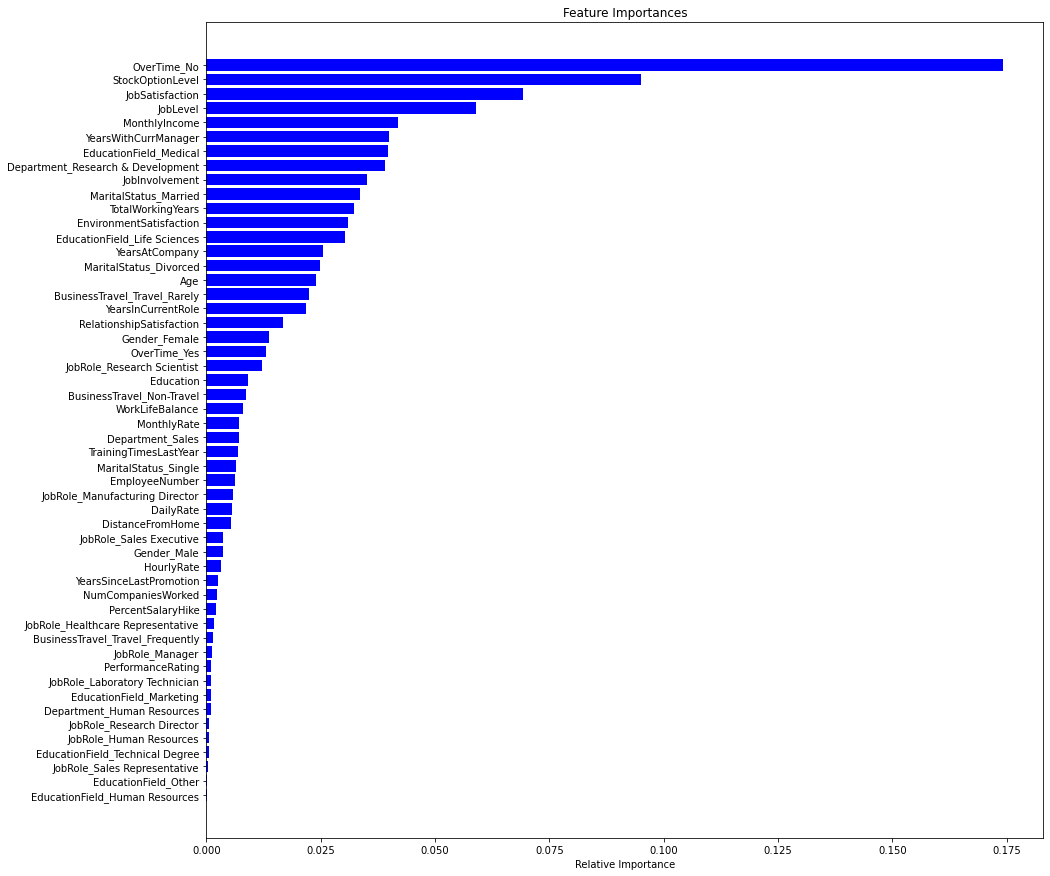

In [55]:
features = x_train_encode.columns.values
importances = rf_s.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Decision Tree Using SMOTE

In [56]:
dt_s = tree.DecisionTreeClassifier()
dt_s.fit(smote_train, smote_target)
dt_predictions = dt_s.predict(x_test_encode)

In [57]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, dt_predictions)*100))
print("F1 score: {}".format(f1_score(y_test_encode, dt_predictions)))
print("="*80)
print(classification_report(y_test_encode, dt_predictions))


Accuracy score: 77.55102040816327
F1 score: 0.33999999999999997
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       245
           1       0.33      0.35      0.34        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



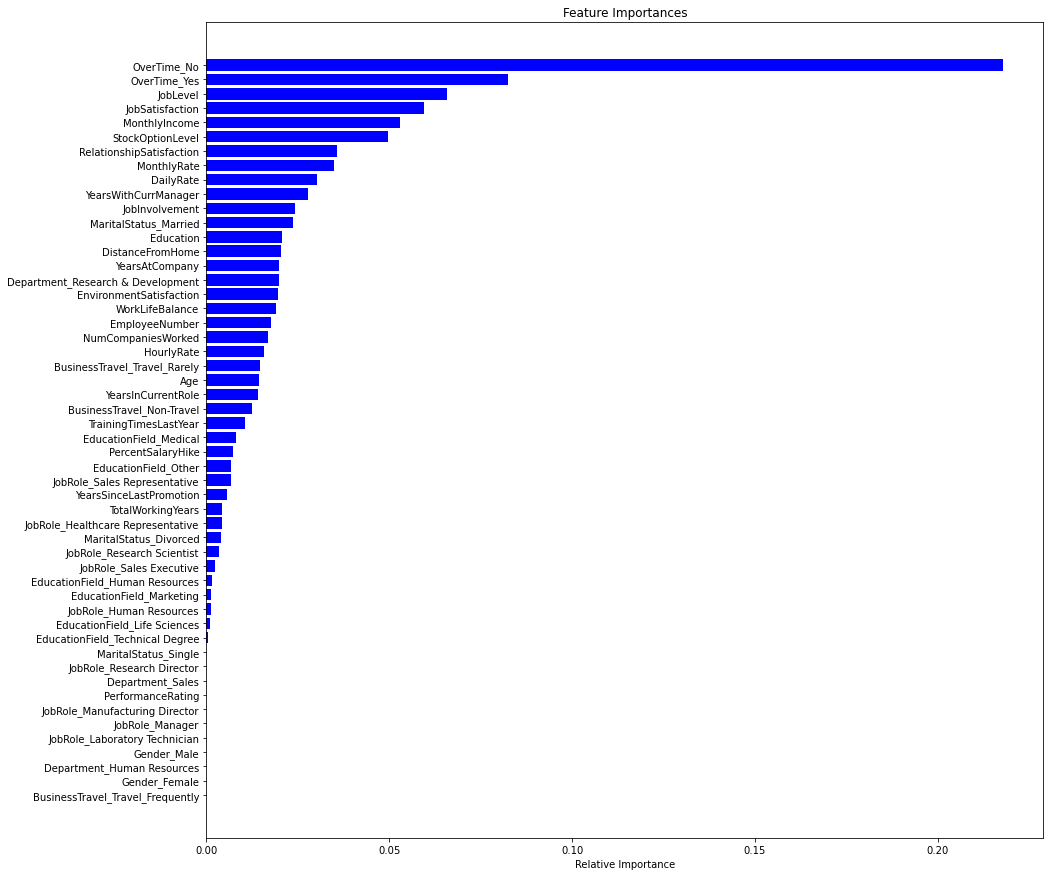

In [58]:
features = x_train_encode.columns.values
importances = dt_s.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosted Classifier using SMOTE

In [59]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}


gb_s = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb_s.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb_s.predict(x_test_encode)

In [60]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, gb_predictions)*100))
print(f1_score(y_test_encode, gb_predictions))
print("="*80)
print(classification_report(y_test_encode, gb_predictions))

Accuracy score: 87.07482993197279
0.4722222222222222
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.74      0.35      0.47        49

    accuracy                           0.87       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294



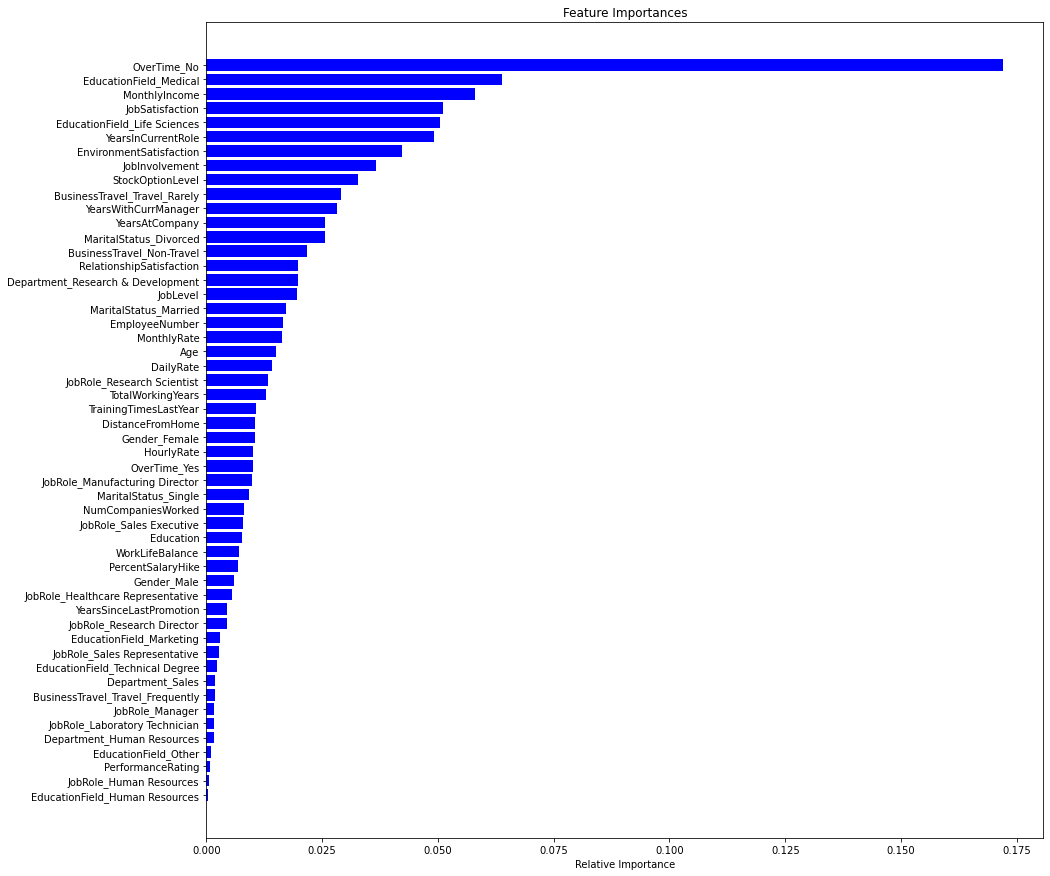

In [61]:
features = x_train_encode.columns.values
importances = gb_s.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
# import module
from tabulate import tabulate
 
# assign data
mydata_1 =[ ["Random Forest Classifier",accuracy_score(y_test_encode, pred_rf),accuracy_score(y_test_encode, rf_predictions)],
    ["Decision Tree",accuracy_score(y_test_encode, pred_dt),accuracy_score(y_test_encode, dt_predictions)],
    ["Gradient Boosted Classifier", accuracy_score(y_test_encode, pred_gb),accuracy_score(y_test_encode, gb_predictions)],
    
        ]

 
# create header
head = ["Model", "Accuracy","Accuracy_SMOTE"]
 
# display table
print(tabulate(mydata_1, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata_1)

+-----------------------------+------------+------------------+
| Model                       |   Accuracy |   Accuracy_SMOTE |
+=============================+============+==================+
| Random Forest Classifier    |   0.860544 |         0.85034  |
+-----------------------------+------------+------------------+
| Decision Tree               |   0.768707 |         0.77551  |
+-----------------------------+------------+------------------+
| Gradient Boosted Classifier |   0.863946 |         0.870748 |
+-----------------------------+------------+------------------+


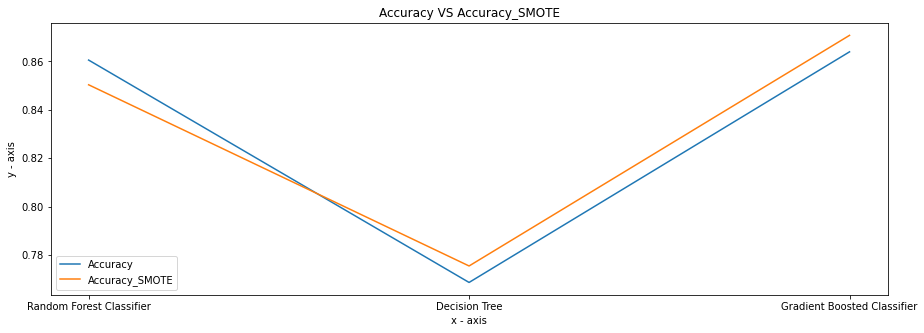

In [63]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table[0],table[1], label = "Accuracy")
plt.plot(table[0],table[2], label = "Accuracy_SMOTE")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Accuracy VS Accuracy_SMOTE')
plt.legend()
plt.show()

## K-Fold Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
x_cv = encoding(df)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'J

In [66]:
x_cv.shape

(1470, 52)

In [67]:
y_cv = target_encode(y)
y_cv.shape

(1470,)

In [68]:
scores_dt = cross_val_score(dt, x_cv,y_cv, cv=10,scoring = 'f1')
scores_gb = cross_val_score(gb, x_cv,y_cv, cv=10,scoring = 'f1')
scores_rf = cross_val_score(rf, x_cv,y_cv, cv=10,scoring = 'f1')

In [69]:
print("Decision Tree CV        : " , scores_dt.mean())
print("Gradient Boosting CV    : " , scores_gb.mean())
print("Random Forest   CV      : " , scores_rf.mean())

Decision Tree CV        :  0.3663439761619766
Gradient Boosting CV    :  0.38227696635473
Random Forest   CV      :  0.28615050371084855


In [70]:
# assign data
mydata_2 =[ ["Random Forest Classifier",f1_score(y_test_encode, pred_rf),f1_score(y_test_encode, rf_predictions),scores_rf.mean()],
    ["Decision Tree",f1_score(y_test_encode, pred_dt),f1_score(y_test_encode, dt_predictions),scores_dt.mean()],
    ["Gradient Boosted Classifier", f1_score(y_test_encode, pred_gb),f1_score(y_test_encode, gb_predictions),scores_gb.mean()],
    
        ]

 
# create header
head = ["Model", "F1","F1_SMOTE","F1_CV"]
 
# display table
print(tabulate(mydata_2, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata_2)

+-----------------------------+----------+------------+----------+
| Model                       |       F1 |   F1_SMOTE |    F1_CV |
+=============================+==========+============+==========+
| Random Forest Classifier    | 0.327869 |   0.511111 | 0.286151 |
+-----------------------------+----------+------------+----------+
| Decision Tree               | 0.346154 |   0.34     | 0.366344 |
+-----------------------------+----------+------------+----------+
| Gradient Boosted Classifier | 0.411765 |   0.472222 | 0.382277 |
+-----------------------------+----------+------------+----------+


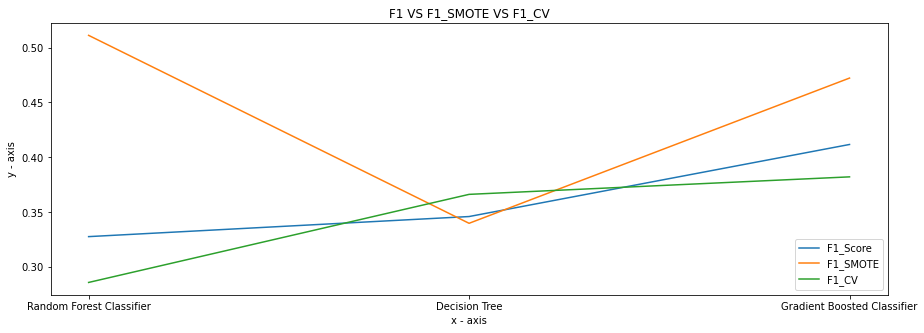

In [71]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table[0],table[1], label = "F1_Score")
plt.plot(table[0],table[2], label = "F1_SMOTE")
plt.plot(table[0],table[3], label = "F1_CV")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('F1 VS F1_SMOTE VS F1_CV')
plt.legend()
plt.show()

### GradientBoosting Tree Using Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)
gsearch1.fit(x_train_encode, y_train_encode)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [79]:
final_model = gsearch1.best_estimator_
final_model

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=80, random_state=10, subsample=0.8)

In [80]:
#Training the model
tree_clas = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=80, random_state=10, subsample=0.8)
tree_clas.fit(x_train_encode, y_train_encode)
y_predict = tree_clas.predict(x_test_encode)

In [81]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, y_predict)*100))
print("F1 score: {}".format(f1_score(y_test_encode, y_predict)))
print("="*80)
print(classification_report(y_test_encode, y_predict))

Accuracy score: 86.73469387755102
F1 score: 0.36065573770491804
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       245
           1       0.92      0.22      0.36        49

    accuracy                           0.87       294
   macro avg       0.89      0.61      0.64       294
weighted avg       0.87      0.87      0.83       294

